# Priyank Krishnamoorthi

# A Brief History

The Titanic was a British passenger built in Belfast, Ireland. The ship was one of three ships that were part of Olympic-class ocean liners. She was very large ship, with a length of 882 feet and 9 inches and a breadth of 92 feet and 6 inches, and weighing 52,310 tons. With ten decks, and plenty of room for the passengers, it made sense to see why she was such a popular choice when traveling across the open seas.

However, a tragedy occurred on April 15, 1912. The Titanic collided with an iceberg during its maiden voyage from Southampton, England to New York City, New York. There was around 2,244 passengers on board with over 1,500 deceased and missing, with anyone missing being declared dead. 

For this project, I will look at predicting if an individual survived the crash or not.

# Importing Necessary Libraries

We'll start by importing the necessary libraries for visualizing, exploring, and analyzing the data

In [214]:
import pandas as pd #The forefront library for data analysis
import numpy as np #The most useful and various math library in python
import matplotlib.pyplot as plt #Used for very concrete visualizations
import seaborn as sns #Shows beautiful visualizations
%matplotlib inline 

# Let's Take a Look

The next step is to look at what the data consists of. But first, we need to create the dataframe from the training csv, that we will be basing our model off of

In [215]:
titanic_train = pd.read_csv("titanic_train.csv")

In [216]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [218]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have a few categorical classes and a few numerical classes. Let's take a gander at the numerical data

In [219]:
numeric_values = ["int64", "float64"]

print(titanic_train.select_dtypes(numeric_values).head(15))

    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0             1         0       3  22.0      1      0   7.2500
1             2         1       1  38.0      1      0  71.2833
2             3         1       3  26.0      0      0   7.9250
3             4         1       1  35.0      1      0  53.1000
4             5         0       3  35.0      0      0   8.0500
5             6         0       3   NaN      0      0   8.4583
6             7         0       1  54.0      0      0  51.8625
7             8         0       3   2.0      3      1  21.0750
8             9         1       3  27.0      0      2  11.1333
9            10         1       2  14.0      1      0  30.0708
10           11         1       3   4.0      1      1  16.7000
11           12         1       1  58.0      0      0  26.5500
12           13         0       3  20.0      0      0   8.0500
13           14         0       3  39.0      1      5  31.2750
14           15         0       3  14.0      0      0  

# Exploratory Data Analysis

Let's visualize some of the variables here

There seem to be some missing numbers in some of the fields. Let's see where they are

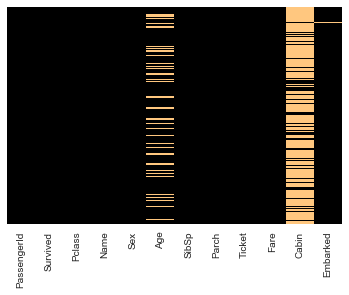

In [220]:
sns.heatmap(data = titanic_train.isnull(), cbar = False, yticklabels = False, cmap = "copper")

From this we can see that Age and Cabin are the two fields that have the majority of null values. Embarked has one or a few null values, but those can be taken care of. 

Realistically speaking, it wouldn't matter what Cabin passengers were in. We will focus on numerical values for this project. 

For Age, what we can do is inspect the common age group for each Passenger Class in the PClass column. 

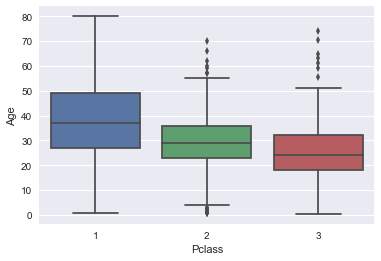

In [221]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic_train)

From the 5 number summary shows in the boxplots for the three Passenger Classes, in Class 1 the median was around 37 years old. In the 2nd class, the median is around 29 years, while in the 3rd class, the median is around 24. We can impute these values into the age column to fill up all of the nulls depending on the class passengers are in.

In [222]:
def replace_nulls(cols):
    age = cols[0] 
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

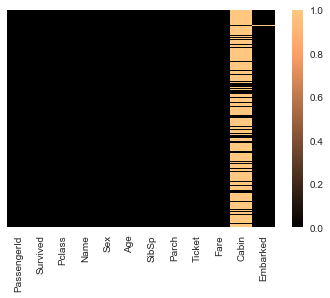

In [223]:
titanic_train["Age"] = titanic_train[["Age", "Pclass"]].apply(replace_nulls, axis = 1)

#Show the heatmap with the null values again
sns.heatmap(titanic_train.isnull(), cbar = True, yticklabels = False, cmap = "copper")

In [224]:
titanic_train.drop(labels = "Cabin", axis = 1, inplace = True)

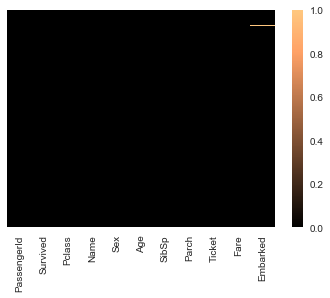

In [225]:
sns.heatmap(titanic_train.isnull(), cbar = True, yticklabels = False, cmap = "copper")

Let's look at other data that might be good to use for predicitions

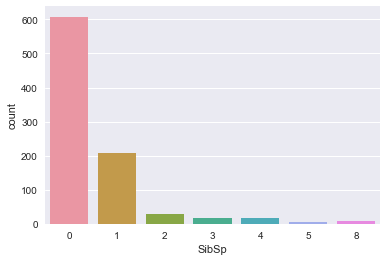

In [226]:
sns.countplot(x = "SibSp", data = titanic_train)

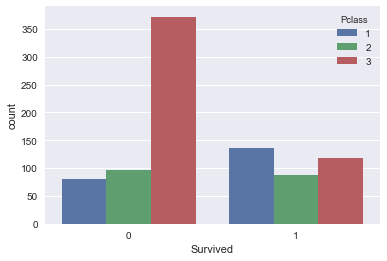

In [227]:
sns.countplot(x = "Survived", data = titanic_train, hue = "Pclass")

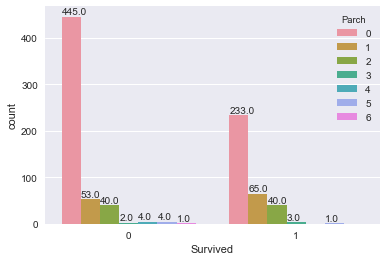

In [228]:
ax = sns.countplot(x = "Survived", data = titanic_train, hue = "Parch")

for data in ax.patches:
    ax.annotate(data.get_height(), xy = (data.get_x(), data.get_height() + 5))

This data could be useful. From looking at the first countplot with SibSp, it can be said that the majority of passengers on board were single or by themselves. The second countplot distinguishes the tragic amount of losses from Class 3 compared to Class 1 and 2 while Class 1 had the most survivors and Class 2 had the least. The third countplot displays that those with 0 parents/children on board were the ones to die the most, unfortunately.

The columns that contain categories of 1 or 2 values can be used as well, such as Sex and Embarked. 

In [229]:
sex = pd.get_dummies(titanic_train["Sex"], drop_first = True)
embarked = pd.get_dummies(titanic_train["Embarked"], drop_first = True)

In [230]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis = 1)

In [231]:
titanic_train.drop(["Sex", "Embarked", "Ticket", "Name", "PassengerId"], axis = 1, inplace = True)

From the data that has been collected and explored, we can come to the conclusion that a lot of the passengers that died on the Titanic were single, had 1 or less sibligs/spouses, had 1 or less parents/children, and were part of class 3. Sex and Embarked might help to bolster the accuracy of the model as we have more features. 

# Prediction Time

In [232]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [233]:
from sklearn.model_selection import train_test_split

#We'll use the useful numerical data for the X and the label of "Survived" as the value to predict
X = titanic_train.drop("Survived", axis = 1)
y = titanic_train["Survived"]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

In this, we'll test out three different ML algorithms. Logistic Regression, Random Forests, and Support Vector Machines

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

my_log_reg = LogisticRegression()
my_rf = RandomForestClassifier()
my_svm = SVC()

In [260]:
my_log_reg.fit(X_train, y_train)
my_rf.fit(X_train, y_train)
my_svm.fit(X_train, y_train)

log_reg_pred = my_log_reg.predict(X_test)
rf_pred = my_rf.predict(X_test)
svm_pred = my_svm.predict(X_test)

In [265]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training set accuracy for Logistic Regression: {:.3f}".format(my_log_reg.score(X_train, y_train)))
print("Testing set accuracy for Logistic Regression: {:.3f}".format(my_log_reg.score(X_test, y_test)))
print("\n")

print("Classification Report for Logistic Regression:")
print("\n")
print(classification_report(y_test, log_reg_pred))

Training set accuracy for Logistic Regression: 0.810
Testing set accuracy for Logistic Regression: 0.762


Classification Report for Logistic Regression:


             precision    recall  f1-score   support

          0       0.76      0.86      0.80       127
          1       0.77      0.64      0.70        96

avg / total       0.76      0.76      0.76       223



In [266]:
print("Training set accuracy for Random Forest: {:.3f}".format(my_rf.score(X_train, y_train)))
print("Testing set accuracy for Random Forest: {:.3f}".format(my_rf.score(X_test, y_test)))
print("\n")

print("Classification Report for Random Forest:")
print("\n")
print(classification_report(y_test, rf_pred))

Training set accuracy for Random Forest: 0.970
Testing set accuracy for Random Forest: 0.821


Classification Report for Random Forest:


             precision    recall  f1-score   support

          0       0.80      0.91      0.85       127
          1       0.86      0.70      0.77        96

avg / total       0.83      0.82      0.82       223



In [268]:
print("Training set accuracy for SVM: {:.3f}".format(my_svm.score(X_train, y_train)))
print("Testing set accuracy for SVM: {:.3f}".format(my_svm.score(X_test, y_test)))
print("\n")

print("Classification Report for Support Vector Machine:")
print("\n")
print(classification_report(y_test, svm_pred))

Training set accuracy for SVM: 0.889
Testing set accuracy for SVM: 0.673


Classification Report for Support Vector Machine:


             precision    recall  f1-score   support

          0       0.66      0.86      0.75       127
          1       0.69      0.43      0.53        96

avg / total       0.68      0.67      0.65       223



So, these are not great precisions or recalls. Precision basically means "How often would the model keep predicting the correct value?" While recall means "How much of these predicted values are true?" Luckily for us, we can tune the parameters of the models to make them a bit more complex so that their accuracies could be better, thus increasing precision and recall. 

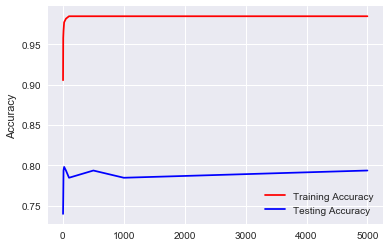

In [318]:
#Random Forest
n_estimator = [2, 5, 10, 20, 50, 100, 500, 1000, 5000]
train_results = []
test_results = []

for estimator in n_estimator:
    my_rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
    my_rf.fit(X_train, y_train)
    rf_pred = my_rf.predict(X_test)
    
    train_results.append(my_rf.score(X_train, y_train))
    test_results.append(my_rf.score(X_test, y_test))

plt.plot(n_estimator, train_results, "r", label = "Training Accuracy")
plt.plot(n_estimator, test_results, "b", label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.legend()

From this visualization of the accuracies, it's almost safe to assume that Random Forests is probably not the best choice to use for this. So we won't use it. Let's see the other ones

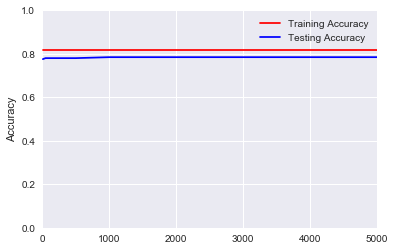

In [399]:
from sklearn.metrics import mean_squared_error

#Logistic Regression
c_values = [10, 50, 100, 500, 1000, 5000]
train_results = []
test_results = []

for c in c_values:
    my_logreg = LogisticRegression(C = c)
    my_logreg.fit(X_train, y_train)
    logreg_pred = my_logreg.predict(X_test)
    
    train_results.append(my_logreg.score(X_train, y_train))
    test_results.append(my_logreg.score(X_test, y_test))

plt.plot(c_values, train_results, "r", label = "Training Accuracy")
plt.plot(c_values, test_results, "b", label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.axis([0, 5000, 0, 1])
plt.legend()

The Training and Testing accuracies are very close with increasing values of C, which is a regularization parameter. Logistic Regression is a very good choice for predicting survivors. It seems as though the higher the value of C, the closer the two accuracies are, which could result in underfitting, but its not that close to.

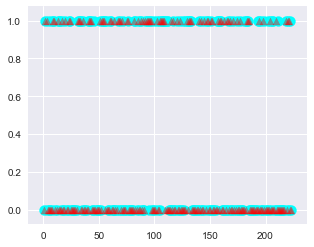

In [400]:
my_logreg = LogisticRegression(C = 5000)
my_logreg.fit(X_train, y_train)
logreg_pred = my_logreg.predict(X_test)

plt.figure(1, figsize = (5, 4))
plt.scatter(range(1, 224), y_test, c = "cyan", marker = "o", s = 100)
plt.scatter(range(1, 224), logreg_pred, c = "red", marker = "^", alpha = 0.4)

The plot displays the actual values in cyan compared to the predictions made by the logisitic regression model in red. When a logistic regression line is fit, a good amount of the points will tend to fall on the line while some won't, as signified  by the accuracies of the training and test set. Now let's check the accuracy of the SVM

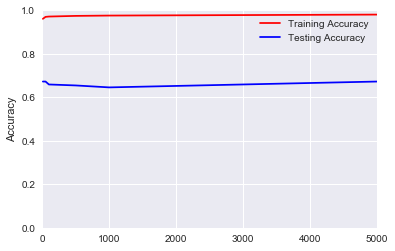

In [398]:
#Logistic Regression
c_values = [10, 50, 100, 500, 1000, 5000]

train_results = []
test_results = []

for index, c in enumerate(c_values):
    my_svm = SVC(C = c)
    my_svm.fit(X_train, y_train)
    svm_pred = my_svm.predict(X_test)
    
    train_results.append(my_svm.score(X_train, y_train))
    test_results.append(my_svm.score(X_test, y_test))

plt.plot(c_values, train_results, "r", label = "Training Accuracy")
plt.plot(c_values, test_results, "b", label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.axis([0, 5000, 0, 1])
plt.legend()

With increasing regularization using the C parameters as well as making things more complex with increasing values of gamma, the SVM overfits the training data and performs poorly on the testing data. SVM would be an absolutely terrible choice for making predictions.

# Conclusion

The reason I chose these three was 1) Logistic Regression because the predicted value could only be "Survived" or "Not Survived", 2) Random Forest because of the depth in which it involes in obtaining a meaningful prediction, and 3) SVMs because it looks for an optimal boundary to create to identify what point belongs where. Random Forest would not improve in  accuracy between the training and test set no matter how complex or simple the model was. Even though it was a high precision, the gap between the prediction accuracies was too much. For SVM, this data set was not as useful as it could have been. Even though there were only two classes, creating multiple hyperplanes to separate the data into their proper classes were not as good as the best option; Logistic Regression. 

With that, we can check the new classification report as well as the confusion matrix to see how accurate the predictions were

In [401]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[111  16]
 [ 32  64]]


             precision    recall  f1-score   support

          0       0.78      0.87      0.82       127
          1       0.80      0.67      0.73        96

avg / total       0.79      0.78      0.78       223



111 of the data points were predicted as people who had survived, while 64 of the points were predicted as those that had unfortunately died. The precision and recall were an adequate 79% and 78% respectively. All in all, there are definitely better ways to calculate the predictions, but for a first project, I think I did well